In [1]:
import yaml
import healpy as hp
import numpy as np
import os
import scipy

from plancklens import utils

from jointmap.plots import CMBLensingPlot 

from delensalot.core import cachers

import os
import numpy as np

from delensalot.core.iterator import statics

import yaml

import matplotlib.pyplot as plt



mpisupport: False, pmisupport: False
disabling mpi
Using lenspyx alm2map


In [2]:
_, _, RGCax, RCGax = np.loadtxt("Rax.txt").T

_, _, _, RCGxa = np.loadtxt("Rxa.txt").T

RGGaa, _, _, _ = np.loadtxt("Raa.txt").T

RGGxx, RCCxx, _, _ = np.loadtxt("Rxx.txt").T


RGGoo, RCCoo, RGCoo, RCGoo = np.loadtxt("Roo.txt").T

/tmp/ipykernel_822415/2915092378.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(-RCGxa/np.sqrt(RGGaa*RCCxx))


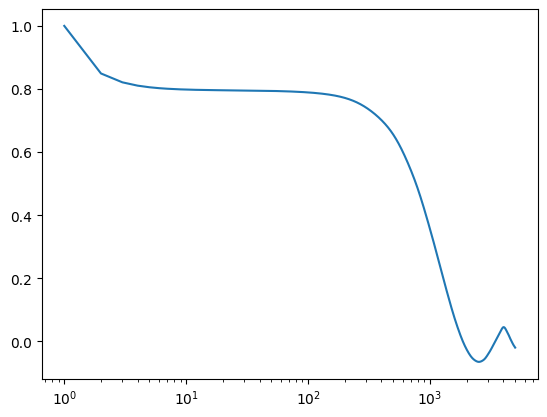

In [3]:
plt.plot(-RCGxa/np.sqrt(RGGaa*RCCxx))
plt.xscale("log")

In [4]:
-RCGxa/np.sqrt(RGGaa*RCCxx)

/tmp/ipykernel_822415/897124417.py:1: RuntimeWarning: invalid value encountered in divide
  -RCGxa/np.sqrt(RGGaa*RCCxx)


array([        nan,  0.99988146,  0.84908931, ..., -0.01960176,
       -0.01966306, -0.01972448])

In [5]:
directory = lambda i: f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_nonzero_version_apo_new_v2_nonzero_official_check_factor_2_vofficial_recs/p_p_sim{i:04}apo_new_v2_nonzero_official_check_factor_2_vofficial/"
cmb = lambda i, name: f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_nonzero/simswalpha/sim_{i:04}_{name}lm.fits"

index = 0
alpha = utils.alm_copy(hp.read_alm(cmb(index, "alpha_")), 5000)
QErec = np.load(directory(index)+"olm0_norm.npy")
QErec_a = np.load(directory(index)+"alm0_norm.npy")
BHrec = np.load(directory(index)+"olm0_bh_norm.npy")

In [6]:
r2 = RCGxa**2/(RGGaa*RCCxx)
N = utils.cli(RCCxx)+utils.cli(RGGaa)*RCGxa**2*utils.cli(RGGxx)**2*utils.cli(1-r2)
NQE = utils.cli(RCCxx)

/tmp/ipykernel_822415/16652593.py:1: RuntimeWarning: invalid value encountered in divide
  r2 = RCGxa**2/(RGGaa*RCCxx)


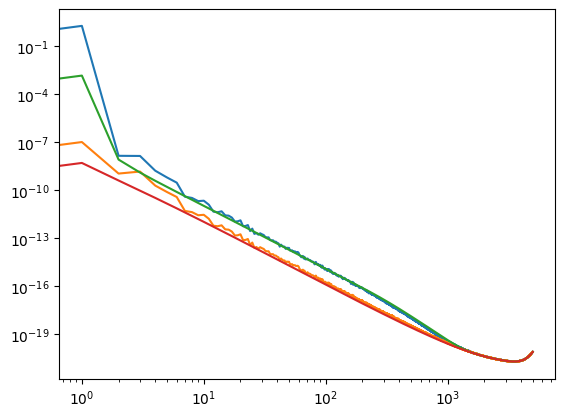

In [7]:
plt.loglog(hp.alm2cl(BHrec))
plt.loglog(hp.alm2cl(QErec))

plt.loglog(N)
plt.plot(NQE)

/tmp/ipykernel_822415/551650678.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  Rxa = RCCxx**-1.*RCGxa
/tmp/ipykernel_822415/551650678.py:1: RuntimeWarning: invalid value encountered in multiply
  Rxa = RCCxx**-1.*RCGxa


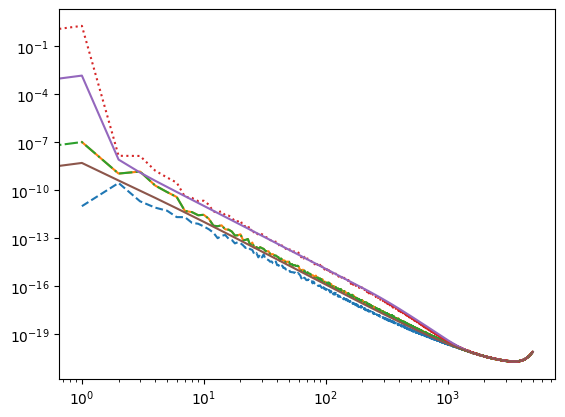

In [8]:
Rxa = RCCxx**-1.*RCGxa
Rax = RGGaa**-1.*RCGax

denominator = 1/(1-Rxa*Rax)

alpha_A = hp.almxfl(QErec_a, Rxa, inplace=False)
alpha_B = hp.almxfl(QErec_a, Rax, inplace=False)

rec_A = hp.almxfl(QErec-alpha_A, denominator)
rec_B = hp.almxfl(QErec-alpha_B, denominator)

plt.loglog(hp.alm2cl(rec_A), ls = "--")
plt.loglog(hp.alm2cl(rec_B), ls = "-")

plt.loglog(hp.alm2cl(QErec), ls = "-.")
plt.loglog(hp.alm2cl(BHrec), ls = ":")

plt.loglog(N)
plt.plot(NQE)

/tmp/ipykernel_822415/1978827844.py:1: RuntimeWarning: invalid value encountered in divide
  get = lambda x: np.sqrt(hp.alm2cl(x, alpha)**2/(hp.alm2cl(x, x)*hp.alm2cl(alpha, alpha)))


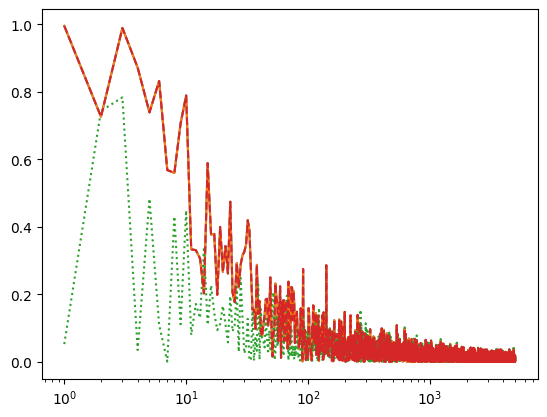

In [9]:
get = lambda x: np.sqrt(hp.alm2cl(x, alpha)**2/(hp.alm2cl(x, x)*hp.alm2cl(alpha, alpha)))
rho = get(QErec)
rhoBH = get(BHrec)
rho_A = get(rec_A)
rho_B = get(rec_B)

plt.plot(rho)
plt.plot(rhoBH)
plt.plot(rho_A, ls = ":")
plt.plot(rho_B, ls = "--")
plt.xscale("log")

In [10]:
Rs = np.load("Rs.npy", allow_pickle=True).take(0)
Rpp = Rs["pp"]
Rff = Rs["ff"][0]
Rfp = Rs["fp"][0]
Rpf = Rs["pf"][0]

Rs_len = np.load("Rs_len.npy", allow_pickle=True).take(0)
Rpp_len = Rs_len["pp"]
Rff_len = Rs_len["ff"][0]
Rfp_len = Rs_len["fp"][0]
Rpf_len = Rs_len["pf"][0]

In [11]:
r2 = Rfp**2/(Rpp*Rff)
N = utils.cli(Rff)+utils.cli(Rpp)*Rfp**2*utils.cli(Rff)**2*utils.cli(1-r2)
NQE = utils.cli(Rff)

r2len = Rfp_len**2/(Rpp_len*Rff_len)
Nlen = utils.cli(Rff_len)+utils.cli(Rpp_len)*Rfp_len**2*utils.cli(Rff_len)**2*utils.cli(1-r2len)
NQElen = utils.cli(Rff_len)

/tmp/ipykernel_822415/3368047706.py:1: RuntimeWarning: invalid value encountered in divide
  r2 = Rfp**2/(Rpp*Rff)
/tmp/ipykernel_822415/3368047706.py:5: RuntimeWarning: invalid value encountered in divide
  r2len = Rfp_len**2/(Rpp_len*Rff_len)


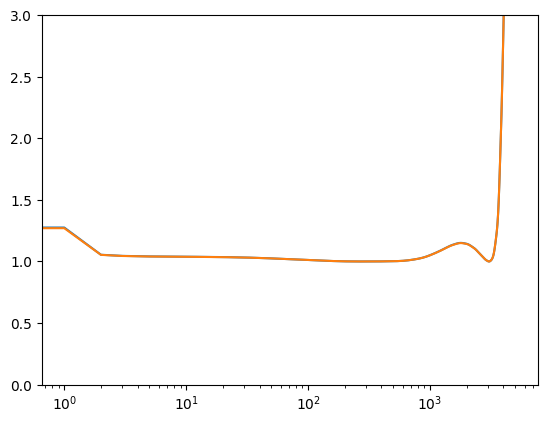

In [12]:
#plt.loglog(N)
plt.plot(N/NQE)
plt.plot(Nlen/NQElen)
plt.ylim(0, 3)
plt.xscale("log")

#plt.loglog(Nlen, ls = "--")
#plt.plot(NQElen, ls = "--")

/tmp/ipykernel_822415/4186982607.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(Rfp/np.sqrt(Rff*Rpp))
/tmp/ipykernel_822415/4186982607.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(Rpf/np.sqrt(Rff*Rpp))
/tmp/ipykernel_822415/4186982607.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(Rfp_len/np.sqrt(Rff_len*Rpp_len))
/tmp/ipykernel_822415/4186982607.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(Rpf_len/np.sqrt(Rff_len*Rpp_len))


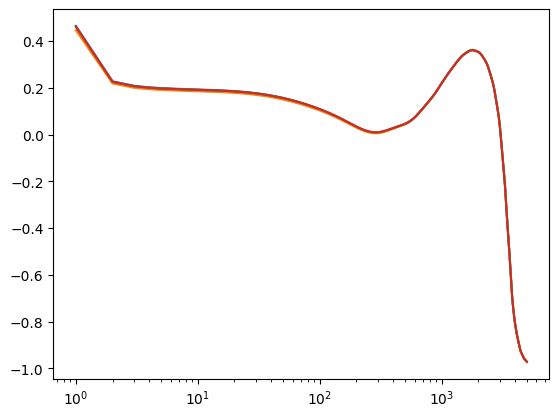

In [13]:
plt.plot(Rfp/np.sqrt(Rff*Rpp))
plt.plot(Rpf/np.sqrt(Rff*Rpp))

plt.plot(Rfp_len/np.sqrt(Rff_len*Rpp_len))
plt.plot(Rpf_len/np.sqrt(Rff_len*Rpp_len))
plt.xscale("log")

In [14]:
autos = []
crosses = []
autosi = []
autosBH = []
crossesBH = []

autosA = []
crossesA = []
autosB = []
crossesB = []


cmb2 = lambda i, name: f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/afpo/simswalpha/sim_{i:04}_{name}lm.fits"

for index in range(1):

    folder = f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/afpo_version_afpo_recs/p_p_sim{index:04}afpo/"
    
    alpha = utils.alm_copy(hp.read_alm(cmb(index, "p")), 5000)
    #tau = utils.alm_copy(hp.read_alm(cmb2(index, "tau_")), 5000)
    QErec = np.load(folder+"flm0_norm.npy")
    QErec_a = np.load(folder+"plm0_norm.npy")
    #BHrec = np.load(directory(index)+"flm0_bh_norm.npy")


    autos.append(hp.alm2cl(QErec))
    crosses.append(hp.alm2cl(QErec, alpha))
    autosBH.append(hp.alm2cl(BHrec))
    crossesBH.append(hp.alm2cl(BHrec, alpha))

    autosi.append(hp.alm2cl(alpha))

    Rfp_ = Rff**-1.*Rpf
    Rfp2_ = Rff**-1.*Rfp
    Rpf_ = Rpp**-1.*Rpf
    denominator = 1/(1-Rfp_*Rpf_)
    alpha_A = hp.almxfl(QErec_a, Rfp2_, inplace=False)
    alpha_B = hp.almxfl(QErec_a, Rfp_, inplace=False)
    rec_A = hp.almxfl(QErec-alpha_A, denominator)
    rec_B = hp.almxfl(QErec-alpha_B, denominator)


    #plm0 = np.load(folder+"phi_plm_it000.npy")
    #_, flm0, plm0, _ = np.split(plm0, 4)

    #Rff, Rpp, Rpf, Rfp = np.loadtxt("../jobs/respsff.txt").T
    QErecunnorm = hp.almxfl(QErec, Rff)
    pfilt = hp.almxfl(QErec_a, Rfp)
    diff = QErecunnorm-pfilt
    diff_filt = hp.almxfl(diff, utils.cli(Rff-utils.cli(Rpp)*Rfp*Rpf))
    rec_A_2 = diff_filt

    autosA.append(hp.alm2cl(rec_A))
    crossesA.append(hp.alm2cl(rec_A, alpha))
    autosB.append(hp.alm2cl(rec_B))
    crossesB.append(hp.alm2cl(rec_B, alpha))
    


autos = np.array(autos)
crosses = np.array(crosses)
autosBH = np.array(autosBH)
crossesBH = np.array(crossesBH)
autosi = np.array(autosi)

autosA = np.array(autosA)
crossesA = np.array(crossesA)
autosB = np.array(autosB)
crossesB = np.array(crossesB)

/tmp/ipykernel_822415/1938288755.py:35: RuntimeWarning: divide by zero encountered in reciprocal
  Rpf_ = Rpp**-1.*Rpf
/tmp/ipykernel_822415/1938288755.py:35: RuntimeWarning: invalid value encountered in multiply
  Rpf_ = Rpp**-1.*Rpf


'plt.plot(hp.alm2cl(tau))\nplt.plot(hp.alm2cl(alpha))'

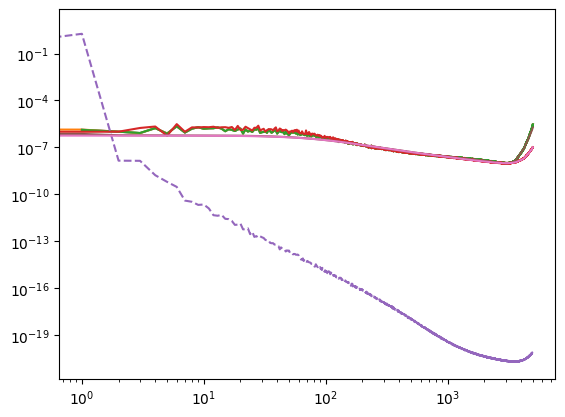

In [15]:
plt.loglog(hp.alm2cl(rec_A))
plt.loglog(hp.alm2cl(rec_A_2))
plt.loglog(hp.alm2cl(rec_B))
plt.plot(hp.alm2cl(QErec))
plt.loglog(hp.alm2cl(BHrec), ls = "--")

plt.plot(N)
plt.loglog(NQE)
"""plt.plot(hp.alm2cl(tau))
plt.plot(hp.alm2cl(alpha))"""

/tmp/ipykernel_822415/2377852810.py:3: RuntimeWarning: invalid value encountered in divide
  rho_quick = lambda a, b, c: c.mean(axis = 0)/np.sqrt(a.mean(axis = 0)*b.mean(axis = 0))
/tmp/ipykernel_822415/2377852810.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1000)


(1.3524866756124827, 1000)

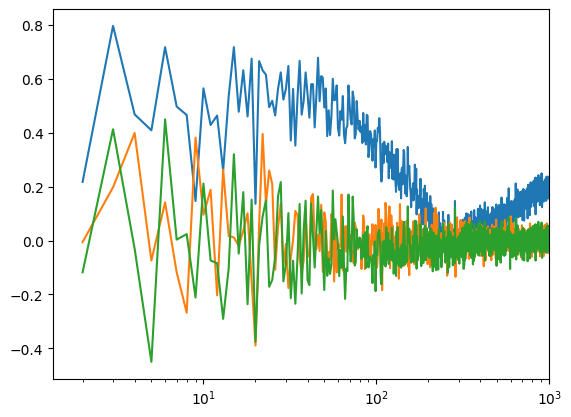

In [16]:
#rho = get(QErec)
#rhoBH = get(BHrec)
rho_quick = lambda a, b, c: c.mean(axis = 0)/np.sqrt(a.mean(axis = 0)*b.mean(axis = 0))

rho = rho_quick(autos, autosi, crosses)
rhoBH = rho_quick(autosBH, autosi, crossesBH)
rhoA = rho_quick(autosA, autosi, crossesA)

plt.plot(rho)
plt.plot(rhoBH)
plt.plot(rhoA)

plt.xscale("log")
#plt.ylim(0, 1)
plt.xlim(0, 1000)

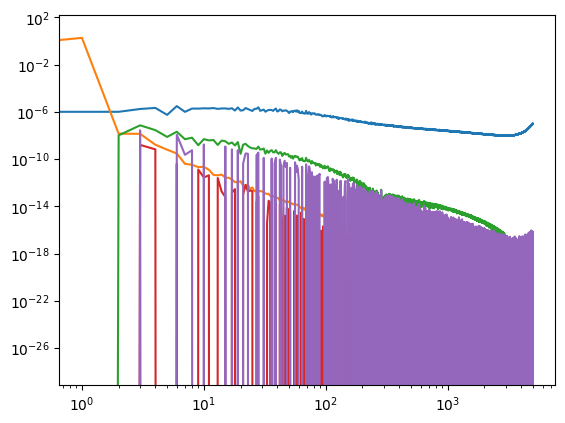

In [17]:
plt.loglog(autos.mean(axis=0))
plt.loglog(autosBH.mean(axis=0))

plt.plot(crosses.mean(axis=0))
plt.plot(crossesBH.mean(axis=0))

plt.plot(crossesB.mean(axis=0))

/tmp/ipykernel_822415/1350592378.py:87: RuntimeWarning: invalid value encountered in divide
  rho_quick = lambda a, b, c: c.mean(axis = 0)/np.sqrt(a.mean(axis = 0)*b.mean(axis = 0))
/tmp/ipykernel_822415/1350592378.py:101: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3000)


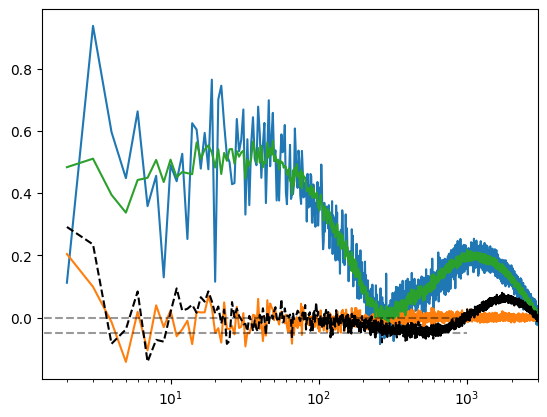

/tmp/ipykernel_822415/1350592378.py:117: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3000)


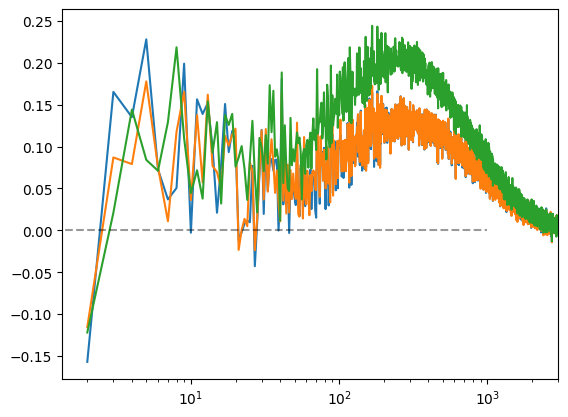

In [57]:
autosMAP = []
crossesMAP = []
autosiMAP = []
signal = []
crosses_signal = []
crosses_BH_signal = []
crosses_MAP_signal = []
autosQE = []

autosBH = []
crossesBH = []

autosMAP2 = []
crossesMAP2 = []

comps = True

if comps:
    ncomp = 4
    compindex = 1
    version = "afpo_04_02_v2"
    idx_min = 0
    idx_max = 9
    itmin, itmax = 0, 15
else:
    ncomp = 2
    compindex = 0
    version = "afpo"
    idx_min = 0
    idx_max = 1
    itmin, itmax = 0, 15

for index in range(idx_min, idx_max):
    folder = f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/afpo_version_{version}_recs/p_p_sim{index:04}{version}/"
    cmb2 = lambda i, name: f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/afpo/simswalpha/sim_{i:04}_{name}lm.fits"
    x = 0
    itrs = [x, x+1]
    itrs = [itmin, itmax]
    plms = statics.rec().load_plms(folder, itrs=itrs)
    plm = utils.alm_copy(hp.read_alm(cmb2(index, "p")), 5000)
    flm = utils.alm_copy(hp.read_alm(cmb2(index, "tau_")), 5000)

    QErec = np.split(np.load(folder+"phi_plm_it000.npy"), ncomp)[compindex]
    BHrec = np.load(folder+"flm0_bh.npy")
    autosBH.append(hp.alm2cl(BHrec))
    crossesBH.append(hp.alm2cl(BHrec, plm))

    autosQE.append(hp.alm2cl(QErec))

    a = np.split(plms[0], ncomp)[compindex]
    autosMAP.append(hp.alm2cl(a))
    crossesMAP.append(hp.alm2cl(a, plm))
    autosiMAP.append(hp.alm2cl(plm))

    a = np.split(plms[1], ncomp)[compindex]
    autosMAP2.append(hp.alm2cl(a))
    crossesMAP2.append(hp.alm2cl(a, plm))

    signal.append(hp.alm2cl(flm))
    crosses_signal.append(hp.alm2cl(flm, QErec))
    crosses_MAP_signal.append(hp.alm2cl(flm, a))
    crosses_BH_signal.append(hp.alm2cl(flm, BHrec))



autosMAP = np.array(autosMAP)
crossesMAP = np.array(crossesMAP)
autosiMAP = np.array(autosiMAP)

autosMAP2 = np.array(autosMAP2)
crossesMAP2 = np.array(crossesMAP2)

crosses_signal = np.array(crosses_signal)
crosses_MAP_signal = np.array(crosses_MAP_signal)
crosses_BH_signal = np.array(crosses_BH_signal)

autosBH = np.array(autosBH)
crossesBH = np.array(crossesBH)

autosQE = np.array(autosQE)

signal = np.array(signal)


#rho = get(QErec)
#rhoBH = get(BHrec)
rho_quick = lambda a, b, c: c.mean(axis = 0)/np.sqrt(a.mean(axis = 0)*b.mean(axis = 0))

rho = rho_quick(autos, autosiMAP, crosses)
rhoBH = rho_quick(autosBH, autosiMAP, crossesBH)
rhoMAP = rho_quick(autosMAP, autosiMAP, crossesMAP)
rhoMAP2 = rho_quick(autosMAP2, autosiMAP, crossesMAP2)

plt.plot(rho)
plt.plot(rhoBH)
plt.plot(rhoMAP)
plt.plot(rhoMAP2, color = "black", ls = "--")

plt.xscale("log")
#plt.ylim(0, 1)
plt.xlim(0, 3000)
plt.hlines(0, 1, 1000, ls = "--", color = "black", alpha = 0.4)
plt.hlines(-0.05, 1, 1000, ls = "--", color = "black", alpha = 0.4)
plt.show()


rho = rho_quick(autosQE, signal, crosses_signal)
rhoBH = rho_quick(autosBH, signal, crosses_BH_signal)
rhoMAP = rho_quick(autosMAP2, signal, crosses_MAP_signal)

plt.plot(rho)
plt.plot(rhoBH)
plt.plot(rhoMAP)

plt.xscale("log")
#plt.ylim(0, 1)
plt.xlim(0, 3000)

plt.hlines(0, 1, 1000, ls = "--", color = "black", alpha = 0.4)

In [52]:
x = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_p_p_afpo_04_02_v2_afpo_0_9_15.npy")
x.shape

(9, 16, 20004)

In [56]:
autosMAP2.mean(axis = 0), x[:, -1, 5001:10002].mean(axis = 0)

(array([0.00000000e+00, 0.00000000e+00, 5.29185507e-11, ...,
        1.75671858e-18, 1.74496661e-18, 1.72862407e-18]),
 array([0.00000000e+00, 0.00000000e+00, 5.29185507e-11, ...,
        1.75671858e-18, 1.74496661e-18, 1.72862407e-18]))

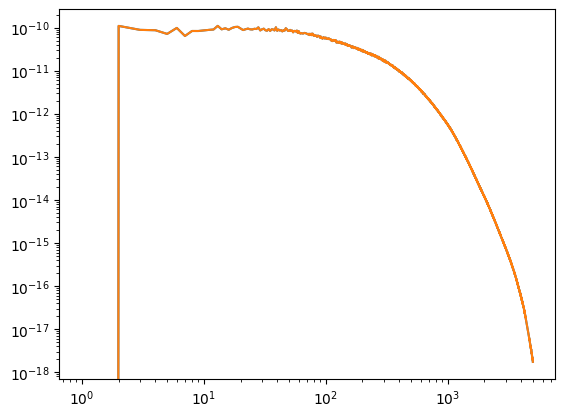

In [54]:
plt.loglog(autosQE.mean(axis = 0))
plt.loglog(x[:, 0, 5001:10002].mean(axis = 0))

In [40]:
rhoBH_contamination = rho_quick(autosBH, autosiMAP, crossesBH)

rhoBH_input = rho_quick(autosBH, signal, crosses_BH_signal)

np.savetxt("rhoBHs.txt", np.c_[rhoBH_contamination, rhoBH_input], header = "rhoBH_contamination rhoBH_input")

/tmp/ipykernel_822415/3797069605.py:87: RuntimeWarning: invalid value encountered in divide
  rho_quick = lambda a, b, c: c.mean(axis = 0)/np.sqrt(a.mean(axis = 0)*b.mean(axis = 0))


/tmp/ipykernel_822415/1075402863.py:16: RuntimeWarning: invalid value encountered in divide
  plt.loglog(crosses_signal.mean(axis = 0)/signal.mean(axis = 0))
/tmp/ipykernel_822415/1075402863.py:17: RuntimeWarning: invalid value encountered in divide
  plt.loglog(crosses_MAP_signal.mean(axis = 0)/signal.mean(axis = 0))


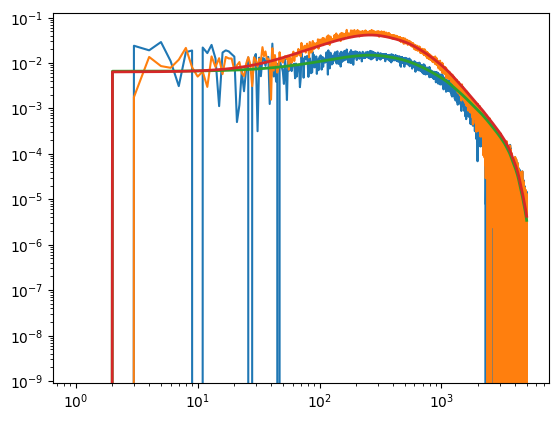

In [39]:
from os.path import join as opj

HOME = os.environ['HOME']
tau_dir = opj(HOME, 'jointmap', 'data', 'tau_lensing_data')
tau_phi = np.loadtxt(opj(tau_dir, "theory_spectra_optimistic_ptau.txt"))
tau_tau = np.loadtxt(opj(tau_dir, "theory_spectra_optimistic_tautau.txt")) 

noise_QE_f = np.loadtxt("noise_biases/ngg_f_QE.txt")
noise_itr_f = np.loadtxt("noise_biases/ngg_f_itr_10.txt")

L = 5000
Wthf = tau_tau[:L]/(tau_tau[:L]+noise_QE_f[:L])
Wthitrf = tau_tau[:L]/(tau_tau[:L]+noise_itr_f[:L])


plt.loglog(crosses_signal.mean(axis = 0)/signal.mean(axis = 0))
plt.loglog(crosses_MAP_signal.mean(axis = 0)/signal.mean(axis = 0))
#plt.loglog(crosses_BH_signal.mean(axis = 0)/signal.mean(axis = 0), alpha = 0.4)

plt.plot(Wthf, lw = 2)
plt.plot(Wthitrf, lw = 2)

## Check mean-fields

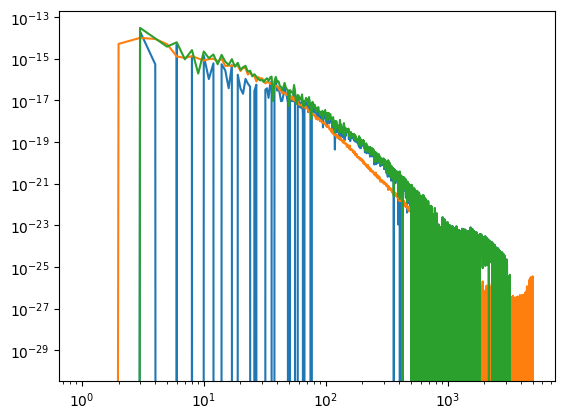

In [40]:
index = 0
plm = utils.alm_copy(hp.read_alm(cmb2(index, "p")), 5000)
itr = 1
folder = f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/afpo_version_afpo_recs/p_p_sim{index:04}afpo/"
filename = lambda i: f'plm_gradpdet_it{itr:03d}_sim{1000+i:04d}.npy'
filenamelik = f'plm_gradplik_it000.npy'
getmf = lambda i: np.load(folder+filename(i))[1]

n = noise_itr_f[:5001]**2

lik = np.split(np.load(folder+filenamelik), 4)[1]
mf = np.mean([getmf(i) for i in range(17)], axis = 0)
tot = lik+mf

plt.plot(-hp.alm2cl(tot, plm)*n)

cllike = hp.alm2cl(lik, plm)

cl = hp.alm2cl(mf, plm)

plt.loglog(cl*n)

plt.loglog(-cllike*n)

/tmp/ipykernel_3133697/816840314.py:7: RuntimeWarning: invalid value encountered in divide
  plt.loglog(cl/base)


(0.9, 1.1)

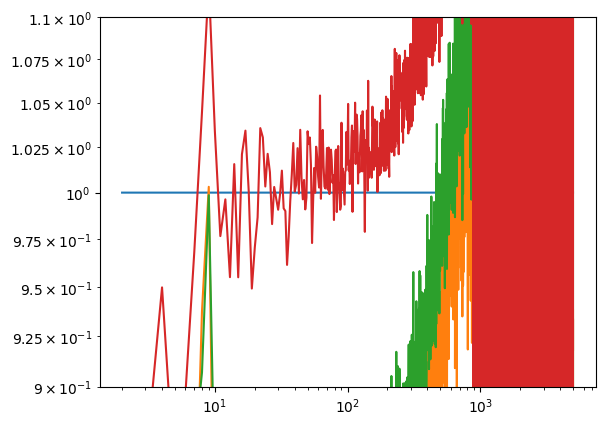

In [41]:
for itr in [1, 2, 3, 15]:
    filename = lambda i: f'plm_gradpdet_it{itr:03d}_sim{1000+i:04d}.npy'
    mf = np.mean([getmf(i) for i in range(13)], axis = 0)
    cl = hp.alm2cl(mf, plm)
    if itr == 1:
        base = cl
    plt.loglog(cl/base)
plt.ylim(0.9, 1.1)

## RDN0 tests for cosmic birefringence

In [9]:
def bin_theory(cl, bin_edges):
    l = np.arange(len(cl))
    sums = scipy.stats.binned_statistic(l, l, statistic="sum", bins=bin_edges)
    cl = scipy.stats.binned_statistic(l, l*cl, statistic="sum", bins=bin_edges)
    cl = cl[0] / sums[0]
    el = (bin_edges[1:] + bin_edges[:-1])/2
    return el, cl


bin_edges = np.arange(10, 4000, 20)


def cross_corr_coeff(a, b, base=0, color=None, plot=True, ax=None, label=None):
    ls = np.arange(len(hp.alm2cl(a)))
    decorator = lambda x: bin_theory(x, bin_edges)
    el, x = decorator(hp.alm2cl(a, b))
    el, aa = decorator(hp.alm2cl(a, a))
    el, bb = decorator(hp.alm2cl(b, b))
    xcorr = np.sqrt(x**2 / (aa * bb))
    if plot and ax is not None:
        ax.plot(el, xcorr - base, color=color, label=label)
    return el, xcorr


def cross_corr_coeff_from_cl(a, b, x, base=0, color=None, plot=True, ax=None, label=None):
    ls = np.arange(len(a))
    decorator = lambda x: bin_theory(x, bin_edges)
    el, x = decorator(x)
    el, aa = decorator(a)
    el, bb = decorator(b)
    xcorr = np.sqrt(x**2 / (aa * bb))
    if plot and ax is not None:
        ax.plot(el, xcorr - base, color=color, label=label)
    return el, xcorr

In [3]:
def load_config(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)
    

def load_inputs(config, selected, scratch, cmbversion, lmax_rec, simidx = 0):
    #input_names = {"p": f"sim_{simidx:04}_plm", "o": f"sim_{simidx:04}_olm", "f": f"sim_{simidx:04}_tau_lm", "a": f"sim_{simidx:04}_alpha_lm"}
    input_names = {"p": f"sim_{simidx:04}_plm", "o": f"sim_{simidx:04}_alpha_lm", "f": f"sim_{simidx:04}_tau_lm", "a": f"sim_{simidx:04}_alpha_lm"}
    inputs = {}
    print("Inputs in", f"{scratch}/{cmbversion}")
    for k in selected:
        input = hp.read_alm(f"{scratch}/{cmbversion}/simswalpha/{input_names[k]}.fits")
        inputs[k] = utils.alm_copy(input, lmax=lmax_rec)
    return inputs


# Function to process a configuration and prepare data for plotting
def process_config(config_path, itrs, subset_selected, simidx = 0):
    config = load_config(config_path)
    scratch = os.getenv("SCRATCH") + "/JOINTRECONSTRUCTION/"
    cmbversion = config["cmb_version"]
    version = config["v"]
    imin = config["imin"]
    simidx = imin
    qe_key = config["k"]
    its_folder = f"{scratch}/{cmbversion}_version_{version}_recs/{qe_key}_sim{simidx:04}{version}/"
    print("Reading from", its_folder)
    recs = statics.rec()
    plms = recs.load_plms(its_folder, itrs=itrs)

    Nselected = len(config["selected"])
    lmax_rec = hp.Alm.getlmax(np.split(plms[0], Nselected)[0].shape[0])
    selected = list(map(lambda s: s[0] if len(s) == 2 else s, config["selected"]))
    subset_selected = [k for k in subset_selected if k in selected]
    inputs = load_inputs(config, selected, scratch, cmbversion, lmax_rec, simidx)
    title = config.get("title", f"Config: {os.path.basename(config_path)}")
    return selected, subset_selected, plms, inputs, lmax_rec, title

## Showing noise levels

In [4]:
bin_edges_B = np.arange(2, 100, 1)
bin_edges = np.concatenate([bin_edges_B, np.arange(100, 800, 100), np.arange(800, 4000, 600)])

decorator = lambda x: bin_theory(x, bin_edges)

bin_edges_B = np.arange(2, 10, 1)
bin_edges = np.concatenate([bin_edges_B, np.arange(10, 200, 20), np.arange(200, 800, 50), np.arange(800, 4000, 600)])

decorator_WF = lambda x: bin_theory(x, bin_edges)

In [5]:
selected = ["a", "p", "o"]

In [6]:
ngg = np.loadtxt(f"n_gg_a_QE.txt")[:5001]
ngg_10 = np.loadtxt(f"ngg_a_itr_10.txt")[:5001]


"""ngg = np.loadtxt(f"sodata/n_gg_a_QE.txt")[:5001]
ngg_10 = np.loadtxt(f"sodata/ngg_a_itr_10.txt")[:5001]
"""

ell = np.arange(0, 5001)
ACB = 7
ns = 1.
cls_alpha = 10**(-ACB)*2*np.pi/(ell*(ell+1))**(ns)
cls_alpha[0] = 0


WFth = cls_alpha/(cls_alpha+ngg)
WFth10 = cls_alpha/(cls_alpha+ngg_10)

/tmp/ipykernel_3460414/1697770919.py:12: RuntimeWarning: divide by zero encountered in divide
  cls_alpha = 10**(-ACB)*2*np.pi/(ell*(ell+1))**(ns)


In [135]:
config_paths = ["official", "official_a_disabled", "official_so_a_disabled", "official", "alpha_after_lensing_sims", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation_no_curl_est"]#,  "config_full_no_alpha_no_curl_lensing_cmb_s4"]


#config_paths = config_paths[1:]
config_paths = [f"configs/{config}.yaml" for config in config_paths]

socase = "so" in config_paths[0]

label = "so" if socase else "s4"
dir = "sodata/" if socase else ""
direc = "_so" if socase else ""

ngg = np.loadtxt(f"{dir}n_gg_a_QE.txt")[:5001]

ngg_10 = np.loadtxt(f"{dir}ngg_a_itr_10.txt")[:5001]

n1aa = np.loadtxt(f"noise_biases/n1_aa_itr_10.txt")
n1_ap = np.loadtxt(f"noise_biases/n1_ap_itr_10.txt")

bin_edges = np.concatenate([np.arange(2, 100, 5), np.arange(100, 400, 100), np.arange(400, 5000, 300)])
dec = lambda x: bin_theory(x, bin_edges)

ii = 0
N0 = ngg_10
ff = (N0**2)[:5001]

(1e-12, 4.119537389574775e-09)

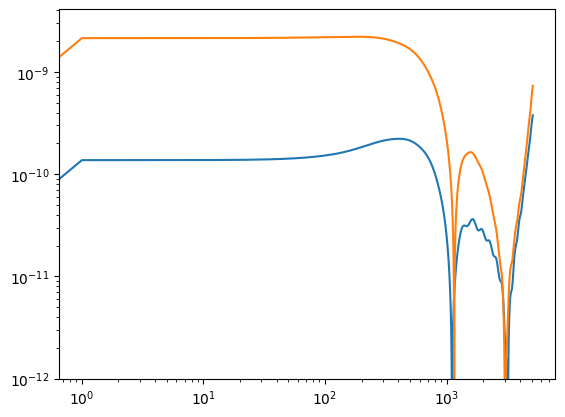

In [83]:
n1_ap = np.loadtxt(f"noise_biases/n1_ap_itr_10.txt")
n1_ap_QE = np.loadtxt(f"noise_biases/n1_ap_QE.txt")

plt.loglog(abs(n1_ap))
plt.plot(abs(n1_ap_QE))
plt.ylim(1e-12)

## QE

In [64]:
qe_rand = np.load("qe_rand.npy")

n1_ap_QE = np.loadtxt(f"noise_biases{direc}/n1_ap_QE.txt")
n1_aa_QE = np.loadtxt(f"noise_biases{direc}/n1_aa_QE.txt")

no_alpha = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_p_p_apo_new_official_check_factor_2_vofficial_no_alpha_apo_new_v2_no_alpha_0_127_15.npy")[..., :5001]
no_alpha_a_disabled = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_p_p_apo_new_official_check_factor_2_vofficial_no_alpha_a_disabled_apo_new_v2_no_alpha_0_127_15.npy")[..., :5001]
no_alpha_no_omega_a_disabled = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_p_p_apo_new_official_check_factor_2_vofficial_no_alpha_a_disabled_no_omega_apo_new_v2_no_alpha_0_15_15.npy")[..., :5001]


alpha = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_p_p_apo_new_v2_nonzero_official_check_factor_2_vofficial_apo_new_v2_nonzero_0_127_15.npy")[..., :5001]
alpha_cross = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_cross_p_p_apo_new_v2_nonzero_official_check_factor_2_vofficial_apo_new_v2_nonzero_0_127_15.npy")[..., :5001]
alpha_cross_lensed = np.load("/home/users/d/darwish/scratch/joint_map_outputs/total_qe_it_cross_lensed_p_p_apo_new_v2_nonzero_official_check_factor_2_vofficial_apo_new_v2_nonzero_0_127_15.npy")[..., :5001]
inputs = np.load("/home/users/d/darwish/scratch/joint_map_outputs/input_apo_new_v2_nonzero_official_check_factor_2_vofficial_apo_new_v2_nonzero_0_127_15.npy")[:, 0, :]

WFs = alpha_cross/inputs[:, None, :]
WFsmean = WFs.mean(axis = 0)

WFls = alpha_cross_lensed/inputs[:, None, :]
WFlsmean = WFls.mean(axis = 0)

WFsa = alpha/inputs[:, None, :]
WFsmeana = WFsa.mean(axis = 0)

inputmean = inputs.mean(axis = 0)

/tmp/ipykernel_3460414/2030460614.py:16: RuntimeWarning: invalid value encountered in divide
  WFs = alpha_cross/inputs[:, None, :]
/tmp/ipykernel_3460414/2030460614.py:19: RuntimeWarning: invalid value encountered in divide
  WFls = alpha_cross_lensed/inputs[:, None, :]
/tmp/ipykernel_3460414/2030460614.py:22: RuntimeWarning: invalid value encountered in divide
  WFsa = alpha/inputs[:, None, :]


In [13]:
autoQE = alpha[:, 0, :]
crossQE = alpha_cross[:, 0, :]
WFQE = WFs[:, 0, :]
WFlQE = WFls[:, 0, :]

WFQEmean = WFsmean[0]
WFlQEmean = WFlsmean[0]

In [14]:
autoQE_thnorm = autoQE*WFth**-2.
autoQE_empnorm = autoQE*WFQEmean**-2.
autoQE_emplnorm = autoQE*WFlQEmean**-2.

/tmp/ipykernel_3460414/727192048.py:1: RuntimeWarning: divide by zero encountered in power
  autoQE_thnorm = autoQE*WFth**-2.
/tmp/ipykernel_3460414/727192048.py:1: RuntimeWarning: invalid value encountered in multiply
  autoQE_thnorm = autoQE*WFth**-2.


/tmp/ipykernel_3460414/367444105.py:1: RuntimeWarning: divide by zero encountered in power
  plt.loglog(qe_rand.mean(axis = 0)*WFth**-2.)
/tmp/ipykernel_3460414/367444105.py:1: RuntimeWarning: invalid value encountered in multiply
  plt.loglog(qe_rand.mean(axis = 0)*WFth**-2.)
/tmp/ipykernel_3460414/367444105.py:7: RuntimeWarning: divide by zero encountered in power
  plt.plot(autoQE_thnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean, label = "WF th")
/tmp/ipykernel_3460414/367444105.py:7: RuntimeWarning: invalid value encountered in multiply
  plt.plot(autoQE_thnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean, label = "WF th")
/tmp/ipykernel_3460414/367444105.py:10: RuntimeWarning: divide by zero encountered in power
  res = autoQE_empnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean
/tmp/ipykernel_3460414/367444105.py:10: RuntimeWarning: invalid value encountered in multiply
  res = autoQE_empnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2

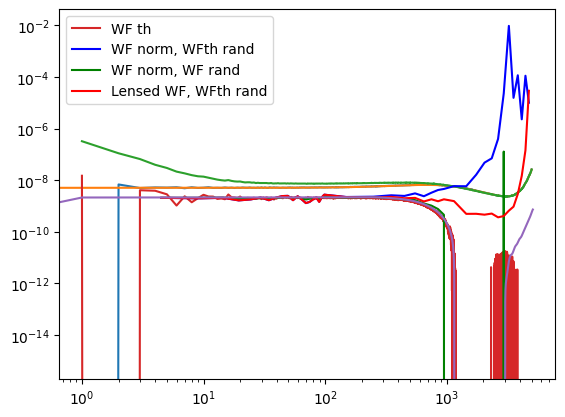

In [15]:
plt.loglog(qe_rand.mean(axis = 0)*WFth**-2.)
plt.plot(ngg)

plt.plot(autoQE_thnorm.mean(axis = 0))
#plt.plot(autoQE_empnorm.mean(axis = 0))

plt.plot(autoQE_thnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean, label = "WF th")


res = autoQE_empnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean
#plt.plot(res, alpha = 0.4, color = "blue")
plt.plot(*decorator_WF(res), color = "blue", label = "WF norm, WFth rand")


res = autoQE_empnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFQEmean**-2.-inputmean
res_QE = res.copy()
#plt.plot(res, alpha = 0.4, color = "blue")
plt.plot(*decorator_WF(res), color = "green", label = "WF norm, WF rand")

res = autoQE_emplnorm.mean(axis = 0)-qe_rand.mean(axis = 0)*WFth**-2.-inputmean
#plt.plot(res, alpha = 0.4, color = "red")
plt.plot(*decorator_WF(res), color = "red", label = "Lensed WF, WFth rand")
#need to get right the norm of QE
#need to get right the norm of the randomized

plt.plot(n1_ap_QE)

plt.legend()

## MAP estimator calculation

/tmp/ipykernel_3460414/1629504416.py:7: RuntimeWarning: divide by zero encountered in divide
  cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns


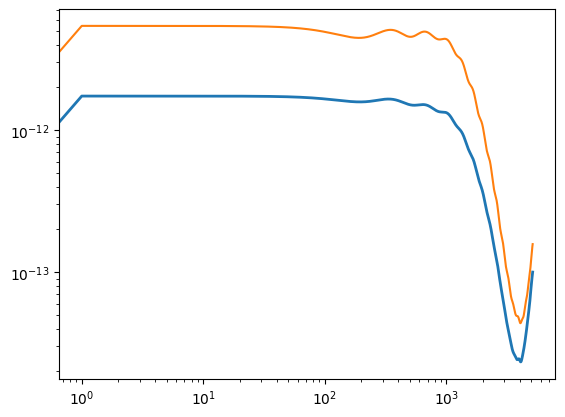

In [44]:
n1aa_der = np.loadtxt("n1_aa_derot.txt")
n1aa = np.loadtxt(f"noise_biases/n1_aa_itr_10.txt")

ns = 1
ACB = 7
ell = np.arange(0, 5000+1)
cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns
cls_alpha_th[0] = 0


plt.loglog(n1aa_der, lw = 2)
plt.loglog(n1aa)

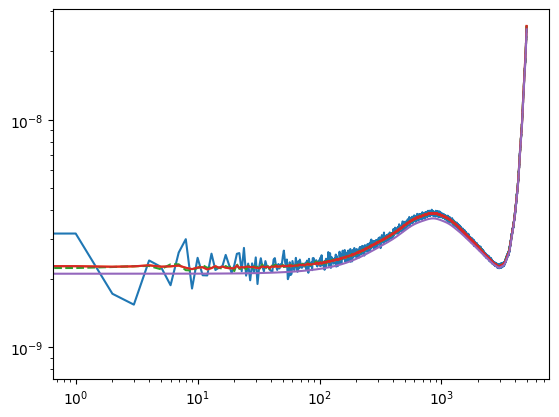

In [17]:
NNs = 30
meanrand = 0
meanrand_no_alpha = 0
Nsims = 127
meanrands = []
for xs in range(Nsims):
    newrand_no_alpha = np.array([np.load(f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_no_alpha_version_apo_new_official_check_factor_2_vofficial_no_alpha_recs/p_p_sim{xs:04}apo_new_official_check_factor_2_vofficial_no_alpha/"+f"plm_N0p015_vrandnew_sim{i:04}.npy")*ff for i in range(NNs)])
    newrand = np.array([np.load(f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_nonzero_version_apo_new_v2_nonzero_official_check_factor_2_vofficial_recs/p_p_sim{xs:04}apo_new_v2_nonzero_official_check_factor_2_vofficial/"+f"plm_N0p015_vrandnew_sim{i:04}.npy")*ff for i in range(NNs)])
    meanrand += newrand.mean(axis = 0)
    meanrands.append(newrand.mean(axis = 0))
    if xs == 31:
        meanrand32 = meanrand.copy()
        meanrand32 /= 32
    meanrand_no_alpha += newrand_no_alpha.mean(axis = 0)


meanrands = np.array(meanrands)
meanrand /= Nsims
meanrand_no_alpha /= Nsims

a = newrand.mean(axis = 0)
plt.loglog(a)

plt.plot(meanrand_no_alpha)
plt.plot(meanrand32, ls = "--")
plt.plot(meanrand)

plt.plot(N0)

In [18]:
WF, WFl = np.load("WFS_10.txt.npy").T

/tmp/ipykernel_3460414/614850197.py:1: RuntimeWarning: invalid value encountered in divide
  WFs = alpha_cross/inputs[:, None, :]
/tmp/ipykernel_3460414/614850197.py:4: RuntimeWarning: invalid value encountered in divide
  WFsa = alpha/inputs[:, None, :]


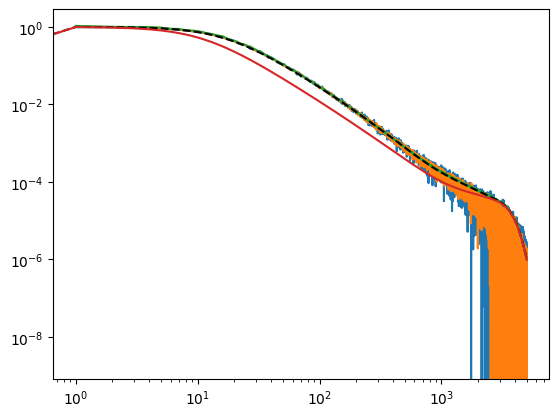

In [104]:
WFs = alpha_cross/inputs[:, None, :]
WFsmean = WFs.mean(axis = 0)

WFsa = alpha/inputs[:, None, :]
WFsmeana = WFsa.mean(axis = 0)

#plt.plot(WFs[0, -1, :])
plt.plot(WF)
plt.loglog(WFsmean[-1])
plt.plot(WFsmeana[-1])
plt.plot(WFth10, color = "black", ls = "--")

plt.plot(WFth)

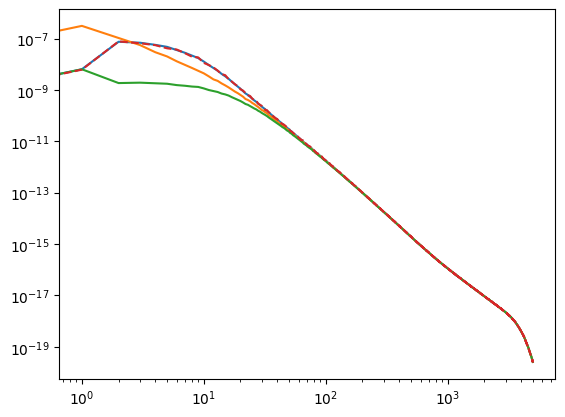

In [34]:
plt.loglog(no_alpha_a_disabled.mean(axis = 0)[-1])
plt.loglog(alpha.mean(axis = 0)[-1])
plt.loglog(no_alpha.mean(axis = 0)[-1])
plt.loglog(no_alpha_no_omega_a_disabled.mean(axis = 0)[-1], ls = "--")

In [158]:
dd = "/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_nonzero_version_apo_new_v2_nonzero_official_check_factor_2_vofficial_recs/p_p_sim0000apo_new_v2_nonzero_official_check_factor_2_vofficial/"
mfs1 = np.mean([np.load(dd+f"plm_gradpdet_it001_sim{1000+i}.npy")[0] for i in range(4)], axis = 0)
mfs = np.mean([np.load(dd+f"plm_gradpdet_it015_sim{1000+i}.npy")[0] for i in range(4)], axis = 0)

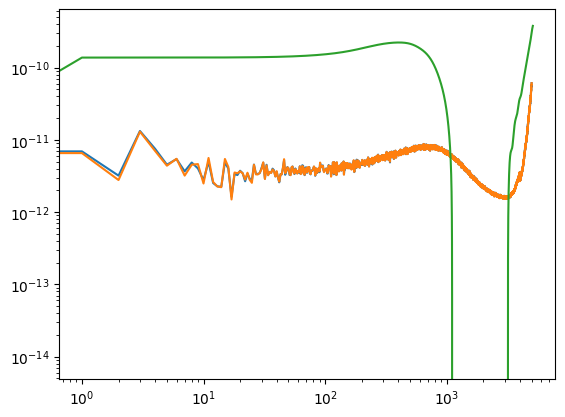

In [159]:
plt.plot(hp.alm2cl(mfs1)*N0**2)
plt.plot(hp.alm2cl(mfs)*N0**2)
plt.loglog(n1_ap)

/tmp/ipykernel_3460414/864455842.py:13: RuntimeWarning: divide by zero encountered in power
  norm = WFth**-2. if itr == 0 else WFth10**-2.
/tmp/ipykernel_3460414/864455842.py:14: RuntimeWarning: invalid value encountered in multiply
  no_alpha_ = autonoalphaMAP.mean(axis = 0)*norm
/tmp/ipykernel_3460414/864455842.py:16: RuntimeWarning: invalid value encountered in multiply
  with_alpha_ = autoMAP.mean(axis = 0)*norm-cls_alpha[:5001]


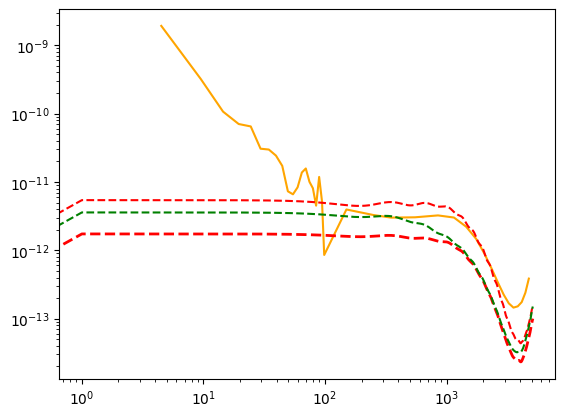

/tmp/ipykernel_3460414/864455842.py:33: RuntimeWarning: divide by zero encountered in divide
  cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns


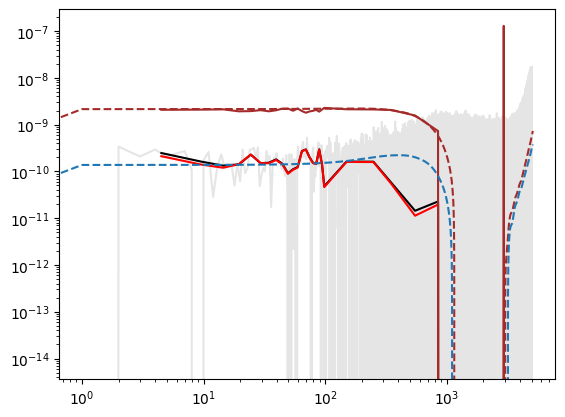

In [160]:
itr = -1
autoMAP = alpha[:, itr, :]
autonoalphaMAP = no_alpha[:, itr, :]
crossMAP = alpha_cross[:, itr, :]
WFMAP = WFs[:, itr, :]
WFlMAP = WFls[:, itr, :]

WFMAPmean = WFsmean[itr]
WFlMAPmean = WFlsmean[itr]


norm = WFMAPmean**-2.
norm = WFth**-2. if itr == 0 else WFth10**-2.
no_alpha_ = autonoalphaMAP.mean(axis = 0)*norm
elb, no_alphab = dec(no_alpha_)
with_alpha_ = autoMAP.mean(axis = 0)*norm-cls_alpha[:5001]
elb, alphab = dec(with_alpha_)

#plt.loglog(with_alpha_-no_alpha_, color = "Orange")
plt.plot(elb, alphab-no_alphab, color = "Orange")
plt.loglog(n1aa, color = "red", ls = "--")
plt.plot(n1aa_der, color = "red", ls = "--", lw = 2)

plt.plot(n1_aa_QE, color = "green", ls = "--")

plt.show()

#####################################################

ns = 1
ACB = 7
ell = np.arange(0, 5000+1)
cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns
cls_alpha_th[0] = 0

norm = WFlMAPmean**-2.
#norm = WFsmeana[-1]**-2.
noise = ngg if itr == 0 else ngg_10
N = meanrand if itr != 0 else ngg


res_rand = autonoalphaMAP.mean(axis = 0)*norm-N
elb, resb = dec(res_rand)
plt.plot(elb, -resb, color = "black")
plt.plot(-res_rand, color = "black", alpha = 0.1)

res_rand = autoMAP.mean(axis = 0)*norm-N-inputmean
elb, resb = dec(res_rand)
plt.plot(elb, -resb, color = "red")

plt.plot(*dec(res_QE), color = "brown")
plt.loglog(n1_ap_QE, color = "brown", ls = "--")

plt.loglog(n1_ap, ls = "--")

plt.show()



/tmp/ipykernel_3460414/536921174.py:4: RuntimeWarning: divide by zero encountered in divide
  cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns
/tmp/ipykernel_3460414/536921174.py:51: RuntimeWarning: divide by zero encountered in power
  res_rand = autoMAP.mean(axis = 0)*WFth10**-2.-N0-inputmean
/tmp/ipykernel_3460414/536921174.py:51: RuntimeWarning: invalid value encountered in multiply
  res_rand = autoMAP.mean(axis = 0)*WFth10**-2.-N0-inputmean


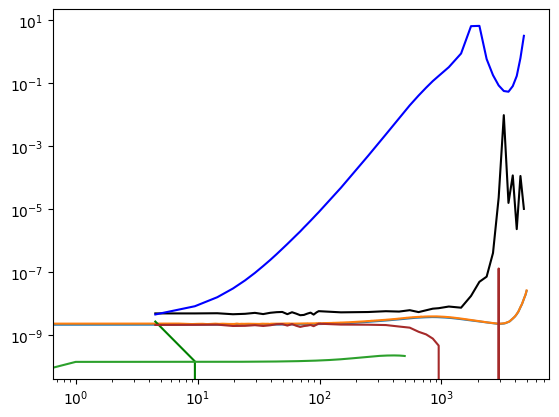

In [80]:
ns = 1
ACB = 7
ell = np.arange(0, 5000+1)
cls_alpha_th = 10**(-ACB)*2*np.pi/(ell*(ell+1))**ns
cls_alpha_th[0] = 0

#plt.plot(means[0])
"""plt.plot(randmeans[1:].mean(axis = 0), alpha = 0.4)


NN = 40
Rnew = meanrands[NN:].mean(axis = 0)**-1.
newmean = randmeans[0]/ff*Rnew**-2.
newmean = randmeans[:NN].mean(axis = 0)/ff*Rnew**-2."""

plt.loglog(N0)
#plt.plot(n1aa)
plt.plot(meanrand)

WF_corr = np.nan_to_num(WFl/WFthnew)
from scipy.interpolate import UnivariateSpline
el = np.concatenate([np.arange(1, 300, 10), np.arange(300, 1500, 500)])
corr = UnivariateSpline(el, WF_corr[el])(elb) 
WFmap = np.interp(elb, np.arange(WFth10.size), WFth10)*corr

no_alphab *= WFmap**-2.
meanrandb = dec(meanrand)[1]


res_rands = autonoalphaMAP*WFMAPmean**-2.-meanrands
res_rands_std = np.std(res_rands, axis = 0)


NN = 64
RDN0 = meanrands[:NN].mean(axis = 0) #average N0, assume it is the truth
RDN02 = meanrands[NN:].mean(axis = 0)*ff**-1
RDN02 *= RDN0**2 

WFthnew = cls_alpha_th[:5001]/(N0+cls_alpha_th[:5001])

res_rand = autonoalphaMAP.mean(axis = 0)*WFMAPmean**-2.-meanrand_no_alpha
#res_rand = autonoalphaMAP.mean(axis = 0)*WFthnew**-2.-RDN02
elb, resb = dec(res_rand)
plt.plot(elb, resb, color = "black")
plt.plot(elb, no_alphab-meanrandb, color = "blue")

res_rand = autonoalphaMAP.mean(axis = 0)-meanrand_no_alpha
elb, resb = dec(res_rand)
plt.plot(elb, resb, color = "green")

res_rand = autoMAP.mean(axis = 0)*WFth10**-2.-N0-inputmean
elb, resb = dec(res_rand)
plt.plot(elb, resb, color = "red")

plt.plot(*dec(res_QE), color = "brown")

plt.plot(n1_ap)

(1e-09, 1e-08)

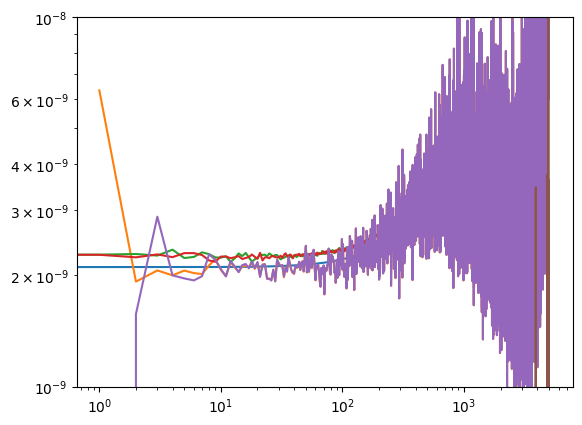

In [23]:
NN = 64
RDN0 = meanrands[:NN].mean(axis = 0) #average N0, assume it is the truth
RDN02 = meanrands[NN:].mean(axis = 0)#*ff**-1

meanrand_no_alpha


plt.plot(N0)
tot = autonoalphaMAP.mean(axis = 0)*WFlMAPmean**-2.
plt.loglog(tot)
plt.plot(RDN02)
plt.plot(RDN0)

tota = autoMAP.mean(axis = 0)*WFlMAPmean**-2.
plt.plot(tota-inputmean)

plt.plot(tota-inputmean-tot)
#plt.plot(-tot+RDN0)
#plt.plot(abs(n1_ap))

plt.plot(n1aa)
plt.ylim(1e-9, 1e-8)
plt.ylim(ymax = 1e-8)



In [24]:
RDN0 = meanrands[:NN].mean(axis = 0) #average N0, assume it is the truth
RDN02 = meanrands[NN:].mean(axis = 0)*ff**-1
RDN02 *= RDN0 

In [148]:
import numpy as np
from scipy.signal import savgol_filter

def smooth_curve(x, y, method='savgol', window=11, poly_order=3):
    """
    Smooth a curve using either Savitzky-Golay filter or moving average.
    
    Parameters:
    x: array-like, x coordinates
    y: array-like, y coordinates to smooth
    method: str, 'savgol' or 'moving_average'
    window: int, window size (must be odd for savgol)
    poly_order: int, polynomial order for savgol filter
    
    Returns:
    smoothed y values
    """
    if method == 'savgol':
        # Ensure window is odd
        window = window + 1 if window % 2 == 0 else window
        return savgol_filter(y, window, poly_order)
    
    elif method == 'moving_average':
        return np.convolve(y, np.ones(window)/window, mode='valid')

# Example usage:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)  # Noisy sine wave

# Using Savitzky-Golay
y_smooth_sg = smooth_curve(x, y, method='savgol', window=11, poly_order=3)

# Using moving average
y_smooth_ma = smooth_curve(x, y, method='moving_average', window=5)

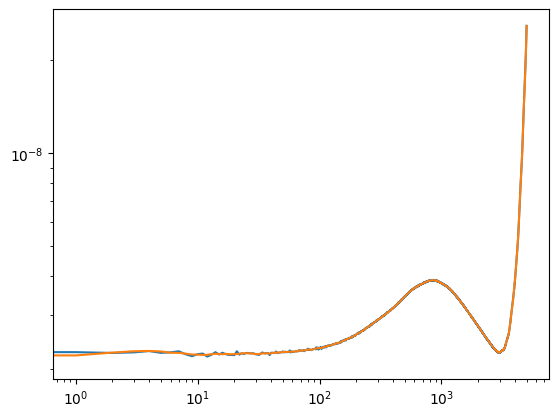

In [149]:
ls = np.arange(meanrand.size)
plt.loglog(meanrand)
plt.plot(smooth_curve(ls, meanrand))


/tmp/ipykernel_3460414/1908436678.py:1: RuntimeWarning: divide by zero encountered in power
  res = no_alpha[:, -1, :].mean(axis = 0)*WFth10**-2.-meanrand
/tmp/ipykernel_3460414/1908436678.py:1: RuntimeWarning: invalid value encountered in multiply
  res = no_alpha[:, -1, :].mean(axis = 0)*WFth10**-2.-meanrand


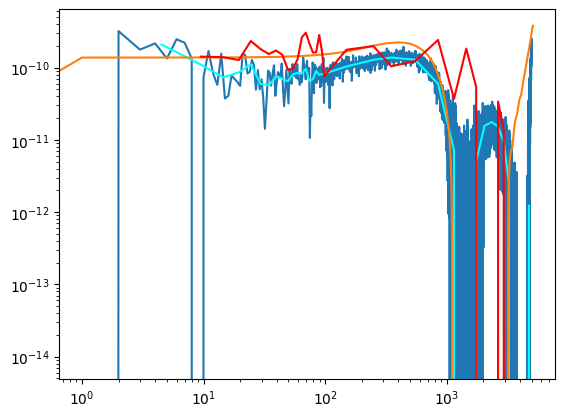

In [153]:
res = no_alpha[:, -1, :].mean(axis = 0)*WFth10**-2.-meanrand
plt.loglog(-res)
elb, resb = dec(res)
plt.plot(elb, -resb, color = "cyan")

plt.plot(n1_ap)

#plt.loglog(no_alpha.mean(axis = 0)-meanrand_no_alpha)

WFlMAPmeansmoothed = smooth_curve(ls, WFlMAPmean)
meanrandsmoothed = smooth_curve(ls, meanrand)
noalphasmoothed = smooth_curve(ls, no_alpha[:, -1, :].mean(axis = 0))

res_rand = noalphasmoothed*WFlMAPmeansmoothed**-2.-meanrandsmoothed
elb, resb = dec(-res_rand)
plt.plot(elb, resb, color = "red")

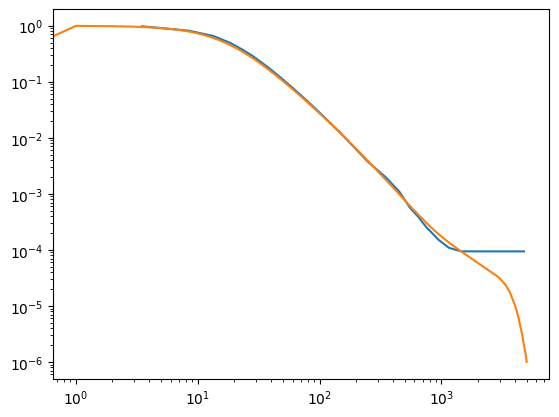

In [208]:
plt.loglog(elb, WFmap)
plt.plot(WFth10)

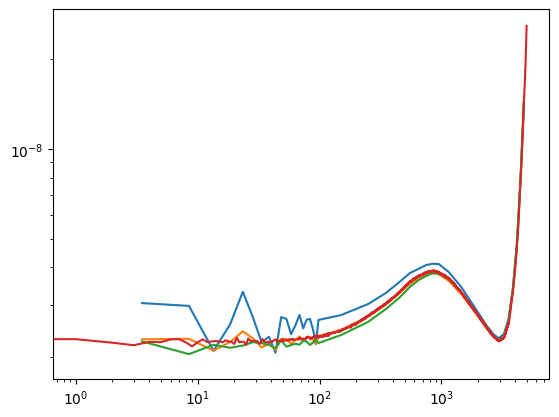

In [122]:
plt.plot(*dec(newmean))
plt.loglog(*dec(means.mean(axis = 0)))
plt.plot(*dec(alms_no_alpha.mean(axis = 0)))
plt.plot(randmeans.mean(axis = 0))

In [31]:
from scipy.interpolate import UnivariateSpline

MAP = alms[0]*WFth10**2. #raw MAP
WF_corr = np.nan_to_num(WF/WFth10)
el = np.arange(1, 1500, 10)
el = np.concatenate([np.arange(1, 300, 10), np.arange(300, 1500, 200)])
#el = np.logspace(0, 3, 100)
corr = UnivariateSpline(el, WF_corr[el])(el) 
WFmap = WFth10[el]*corr

MAP_no_alpha = alms_no_alpha[0]*WFth10**2.
MAP_no_alpha = alms_no_alpha.mean(axis = 0)*WFth10**2.

MAPWF = MAP[el]*WFmap**-2.
MAP_no_alphaWF = MAP_no_alpha[el]*WFmap**-2.


RDN0 = means[0]*ff**-1.
RDN0_simset = np.mean(means[1:], axis = 0)*ff**-1.
Respcorr = utils.cli(N0[el])*UnivariateSpline(el, RDN0_simset[el]*N0[el])(el)
NormRDN0 = RDN0[el]*utils.cli(Respcorr)**2.

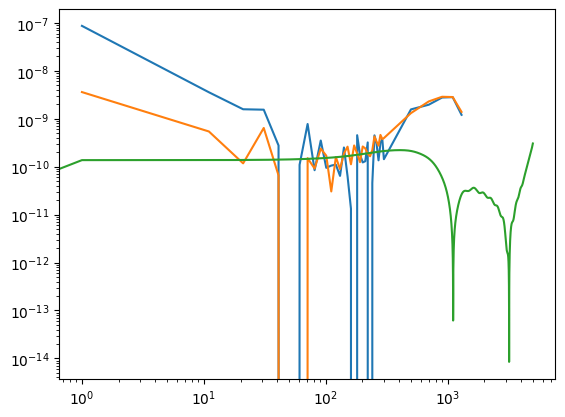

In [32]:
plt.loglog(el, MAPWF-NormRDN0)
plt.plot(el, MAP_no_alphaWF-NormRDN0)
plt.plot(abs(n1_ap[:5001]))

(1.1072318861963556e-09, 1e-08)

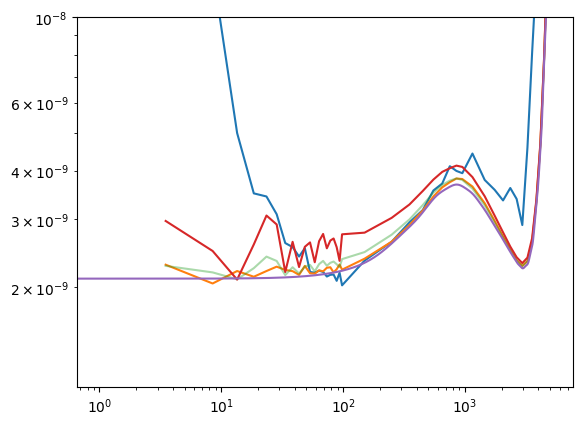

In [164]:
#a = hp.alm2cl(plm0_i_j_A)
#plt.loglog(a*ff)
"""a = hp.alm2cl(plm0_i_j_A_new)
plt.loglog(a*ff)"""
"""b = hp.alm2cl(plm0_i_i_A_new)
plt.loglog(b*ff)"""

"""b = hp.alm2cl(plm0_j_d_A_new)
plt.loglog(b*ff)

b = hp.alm2cl(plm0_d_d_A_new)
plt.loglog(b*ff)"""

WF, WFl = np.load("WFS_10.txt.npy").T
el, WFb = dec(WF)
el, WFlb = dec(WFl)

el, WFthb = dec(WFth10)

el, totb = dec(alms[1:].mean(axis = 0)*WFth10**2/WFl**2)
plt.plot(el, totb)
el, tot_noalphab = dec(alms_no_alpha[1:].mean(axis = 0))
plt.plot(el, tot_noalphab)

el, n0 = dec(means[1:].mean(axis = 0))
plt.plot(el, n0, alpha = 0.4)

Rnew = means[8:].mean(axis = 0)**-1.
newmean = means[0]/ff*Rnew**-2.

newmean = means[:8].mean(axis = 0)/ff*Rnew**-2.
el, newmb = dec(newmean)
plt.plot(el, newmb)

plt.loglog(N0)
#plt.plot(n1aa)

#plt.loglog(alms_no_alpha.mean(axis = 0))

res = alms_no_alpha.mean(axis = 0)-Rnew**-1
#plt.plot(res)
#plt.plot(*dec(res))
#plt.plot(n1_ap[:5001])

"""residual = total-newmean-cls_alpha
#plt.plot(residual)
plt.plot(*dec(-residual))
plt.plot(n1_ap[:5001])"""

plt.ylim(ymax = 1e-8)


In [ ]:
#plt.plot(n1aa)
plt.loglog(n1_ap[:5001])
plt.loglog(n1_ap[:5001]+n1aa[:5001])

In [45]:
itrmax = 30
spec = 0
m2 = 0
counter = 0
for i in range(10):
    for simidx in range(4):
        dirij = f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_version_apo_new_official_check_factor_2_vofficial_recs/p_p_sim{simidx:04}apo_new_official_check_factor_2_vofficial/"

        plm0_i_j_A = np.load(f"{dirij}/plm_N0p{itrmax:03}_i_j_{version}_sim{i:04}.npy")
        plm0_j_i_A = np.load(f"{dirij}/plm_N0p{itrmax:03}_j_i_{version}_sim{i:04}.npy")
        spec += 0.5*hp.alm2cl(plm0_i_j_A+plm0_j_i_A)
        m2 += plm0_i_j_A+plm0_j_i_A
        counter += 1

spec /= counter
m2 /= counter
m2 = hp.alm2cl(m2)


In [ ]:
plt.plot(spec*ff)
plt.plot(m2*ff)
plt.loglog(N0)

In [13]:
bin_edges = np.arange(1, 2000, 10)
dec = lambda x: bin_theory(x, bin_edges)

ii = 0
N0 = ngg_10 if ii == 0 else N0plot
ff = (N0**2)[:5001]

In [ ]:
mean_noise = np.mean([plm0_i_j_A, plm0_i_j_B, plm0_i_j_C, plm0_i_j_D, plm0_i_j_E], axis = 0)
mean_noise_1 = np.mean([plm0_j_i_A, plm0_j_i_B, plm0_j_i_C, plm0_j_i_D, plm0_j_i_E], axis = 0)


"""plt.loglog(hp.alm2cl(plm0_i_j_A)*ff)
plt.loglog(hp.alm2cl(plm0_i_j_A_1)*ff)
plt.loglog(hp.alm2cl(plm0_i_j_A_2)*ff)"""

plt.loglog(hp.alm2cl(plm0_i_j_E)*ff)
#plt.loglog(hp.alm2cl(np.load(f"{dirij}/plm_N0p{15:03}_i_j_{version}_sim{0:04}.npy"))*ff)

cl1 = hp.alm2cl(mean_noise)*ff
#plt.loglog(cl1)
cl2 = hp.alm2cl(mean_noise_1)*ff
plt.loglog(cl2)


"""cl2 = hp.alm2cl(np.load(f"{dirij}/plm_N0p{itrmax:03}_i_i_{version}_sim{0:04}.npy"))*ff
plt.loglog(cl2)"""

#mean_noise = (plm0_i_j_A+plm0_j_i_A)*0.5
#plt.loglog(hp.alm2cl(mean_noise)*ff)
#plt.loglog(hp.alm2cl(plm0_i_j_A, plm0_i_j_B)*ff)
plt.plot(N0)

mean = np.mean([cl1, cl2], axis = 0)
plt.plot(mean)
plt.plot(*dec(mean))



### Mean-field

In [17]:
dd = "/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_version_apo_new_official_check_factor_2_vofficial_recs/p_p_sim0000apo_new_official_check_factor_2_vofficial/"
mf1 = np.load(dd+"plm_gradpdet_it011_sim2000.npy").squeeze()
mf1 = np.split(mf1, 3)[0].squeeze()
mf1_A = np.load(dd+"plm_gradpdet_it011_sim2001.npy").squeeze()
mf1_A = np.split(mf1_A, 3)[0].squeeze()
mf2 = np.load(dd+"plm_gradpdet_it002_sim2000.npy").squeeze()
mf2 = np.split(mf2, 3)[0].squeeze()
mf3 = np.load(dd+"plm_gradpdet_it011_sim2000.npy").squeeze()
mf3 = np.split(mf3, 3)[0].squeeze()

In [ ]:
plt.loglog(hp.alm2cl(mf1)*ff)

meanmf = np.mean([mf1, mf1_A], axis = 0)
plt.loglog(hp.alm2cl(mf1_A)*ff)
plt.loglog(hp.alm2cl(meanmf)*ff)

plt.loglog(hp.alm2cl(mf2)*ff)
plt.loglog(hp.alm2cl(mf3)*ff)

plt.loglog(hp.alm2cl(plm0_i_j_A+plm0_j_i_A)/2*ff)
#plt.loglog(hp.alm2cl(plm0_i_j_A, plm0_i_j_B)*ff)
plt.plot(N0)

In [ ]:
dirij = lambda simidx: f"/home/users/d/darwish/scratch/JOINTRECONSTRUCTION/apo_new_v2_version_apo_new_official_check_factor_2_vofficial_recs/p_p_sim{simidx:04}apo_new_official_check_factor_2_vofficial/"

N0 = ngg_10 if ii == 0 else N0plot
ff = (N0**2)[:5001]

plt.loglog(N0, lw = 4)

N = 1
mean = 0
mean2 = 0

version = "v5"

for x in range(N):
    simidx = 0
    plm0_i_j_A = np.load(f"{dirij(simidx)}/plm_N0p{itrmax:03}_i_j_{version}_sim{x:04}.npy")
    plm0_j_i_A = np.load(f"{dirij(simidx)}/plm_N0p{itrmax:03}_j_i_{version}_sim{x:04}.npy")

    simidx = 1
    plm0_i_j_B = np.load(f"{dirij(simidx)}/plm_N0p{itrmax:03}_i_j_{version}_sim{x:04}.npy")
    plm0_j_i_B = np.load(f"{dirij(simidx)}/plm_N0p{itrmax:03}_j_i_{version}_sim{x:04}.npy")


    p1 = plm0_i_j_A-plm0_j_i_B
    cl_cross = hp.alm2cl(p1)*ff
    mean += cl_cross

    
    mean2 += hp.alm2cl(plm0_i_j_A, plm0_i_j_B)*ff
    #plt.plot(cl_cross*0.5)



mean /= N
mean2 /= N

plt.plot(mean*0.5)
plt.plot(mean2)    

In [ ]:
#cl = 4*hp.alm2cl(plm_id)-2*hp.alm2cl(plm_ij)
#plt.loglog((4*hp.alm2cl(plm_coadd)-2*hp.alm2cl(plm_ij_coadd))*(N0**2)[:5001])

N0 = ngg_10 if ii == 0 else N0plot

ff = (N0**2)[:5001]

plt.loglog((2*hp.alm2cl(plm_ij_coadd))*ff)

plt.loglog(2*coadd*ff)

plt.loglog((hp.alm2cl(plm_ij))*ff)


A = hp.alm2cl(plm0_i_j_B, plm0_i_j_A)
B = hp.alm2cl(plm0_j_i_A, plm0_j_i_B)
#cl_cross = (A+B)/2
#plt.plot(cl_cross*ff)

p1 = plm0_i_j_A+plm0_j_i_A
p2 = plm0_i_j_B+plm0_j_i_B
cl_cross = hp.alm2cl(p1)*ff
plt.plot(cl_cross*0.5)

cl_cross = hp.alm2cl(p2)*ff
plt.plot(cl_cross*0.5)

#cl_cross = ff*(hp.alm2cl(plm0_i_j_A, plm0_j_i_A)+hp.alm2cl(plm0_i_j_B, plm0_j_i_B))#+hp.alm2cl(plm0_i_j_C, plm0_j_i_C)+hp.alm2cl(plm0_i_j_D, plm0_j_i_D))*ff
#plt.plot(cl_cross*2)
#plt.plot(hp.alm2cl(plm0_i_j_A, plm0_j_i_A)*ff*2)


plt.plot(N0)


In [ ]:
NN = 5
dirij = "/users/odarwish/scratch/JOINTRECONSTRUCTION/apo_new_version_apo_new_official_recs/p_p_sim0000apo_new_official/"
prand = ((np.load(f"{dirij}/plm_N0p020_i_j_sim{idx:04}.npy")+np.load(f"{dirij}/plm_N0p020_j_i_sim{idx:04}.npy")) for idx in range(NN))
ii = 0
cl = np.sum(np.array(list(map(lambda x: hp.alm2cl(np.split(x, 3)[ii]).squeeze(), prand))), axis = 0)/NN

if ii == 0:
    plt.loglog(0.5*cl*ngg_10**2.)
    plt.plot(ngg_10)

    source = ii
    itr = -1

    
    #plt.plot(autoits_block2_split[source][itr]*WFs[source][itr]**-2.)


    plt.plot(*decorator(autos_split_full[source][itr]*WFs_full[source][itr]**-2.))

    plt.plot(ngg_a_itr_unl)
else:
    N0plot = np.loadtxt(f"N0s_10.txt")
    plt.loglog(0.5*cl*(N0plot**2)[:5001])
    plt.plot(N0plot)
    #plt.plot(autoits_block2_split[1][-1]*WFs[1][itr]**-2.)

## Noise improvements plots

In [ ]:
selected = ['a', 'p', 'o']

invWFs = {}

config_paths = ["official_check_factor_2", "official_a_disabled", "official_a_disabled", "official_so_a_disabled", "official", "alpha_after_lensing_sims", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation_no_curl_est"]#,  "config_full_no_alpha_no_curl_lensing_cmb_s4"]
config_paths = [f"configs/{config}.yaml" for config in config_paths]


bin_edges_B = np.arange(2, 100, 1)
bin_edges = np.concatenate([bin_edges_B, np.arange(100, 800, 100), np.arange(800, 4000, 600)])


bin_edges_B = np.arange(2, 100, 2)
bin_edges = np.concatenate([bin_edges_B, np.arange(100, 800, 100), np.arange(800, 4000, 600)])

decorator = lambda x: bin_theory(x, bin_edges)


for i, s in enumerate(selected):
    for j, config_path in enumerate(config_paths[:1]):
        selected, autoits, crossits, auto_input_its, _, _, crossits_lensed = process_config_npy(config_path)

        autos = autoits.mean(axis = 0)
        crosses = crossits.mean(axis = 0)
        inputs = auto_input_its.mean(axis = 0)

        stdautos = autoits.std(axis = 0)

        autos_split = np.split(autos, len(selected), axis = -1)
        cross_split = np.split(crosses, len(selected), axis = -1)

        """plt.loglog(cross_split[0][0]*WFth**-1.)

        plt.loglog(cross_split[0][-1]*WFth10**-1.)

        plt.loglog(inputs[0])
        plt.show()"""

        for itr in [0, autos.shape[0]-1]:
    
            WF = cross_split[i][itr]/inputs[i]
            el, WF_ = decorator_WF(WF)
            import scipy.interpolate
            WFf = scipy.interpolate.interp1d(el, WF_, kind = "linear", fill_value = "extrapolate")
            ls = np.arange(100, 5001)
            WFinterp = WFf(ls)
            WFother = WF.copy()
            WFother[100:] = WFinterp
            
            if itr == 0:
                WFQE = WF
            invWF = WF**-1.
            if j == 0:
                invWFs[s] = invWF
            #xx = autos_split[i][itr]*invWFs[s]**2.-inputs[i]

            if i == 1:
                itr_ = 10 if itr in [15, 20] else itr
                N1plot = np.loadtxt(f"N1s_{itr_}.txt")
                N0plot = np.loadtxt(f"N0s_{itr_}.txt")
                plt.loglog(N1plot, ls = "--")
                plt.plot(N0plot, ls = "--")
                if itr == 20:
                    xx = autos_split[i][itr]*WF**-2.-inputs[i]-N0plot[:5001]
                    plt.loglog(xx)


            if itr == 0:

                if i == 0:
                    n1_ap = np.loadtxt(f"noise_biases{direc}/n1_ap_QE.txt")
                    plt.loglog(n1_ap, label = r"$N_1^{\hat{\alpha}\phi, \mathrm{QE}}}$", ls = ":")


                xx = autos_split[i][itr]*WF**-2.-inputs[i]-n1_ap[:5001]*(i == 0)
                plt.loglog(xx)

                #n1_aa = np.loadtxt(f"noise_biases{direc}/n1_aa_QE.txt")
                #plt.loglog(n1_aa, ls = "--")
                el, x = decorator(xx)
                
                #plt.plot(autos_split[i][itr]*WFth**-2.-nggs["a"][:5001]-inputs[i], color = "green")
               # plt.plot(autos_split[i][itr]*WFth**-2., color = "green")
                #plt.plot(el, x, lw = 2, label = r"$C_L^{\hat{\alpha}^{\mathrm{QE}}\hat{\alpha}^{\mathrm{QE}}}-C_L^{\alpha\alpha}-N_1^{\hat{\alpha}\phi}$")

                xx = autos_split[i][itr]*WFth**-2.-inputs[i]-ngg[:5001]
                el, x = decorator(xx)
                plt.plot(xx)

                if i == 0:
                    plt.plot(ngg, color = "black", alpha = 0.4, label = r"$N_0^{\mathrm{QE}}$", ls = "--")
                
                #el, xy = decorator(autos_split[i][itr]*invWFs[s]**2.)
                #el, xy = decorator(autos_split[i][itr]*WFth**-2.)
                #plt.plot(el, xy, label = "WF normalized")
                #np.savetxt("x.txt", np.c_[el, xy])

                
                #el, xy = decorator(qe_alpha)
                #plt.plot(el, xy, ls = "--", label = "QE normalized")

            else:

                WFnorm = WFth10
                #WFnorm = WFother
                WFnorm = WF
                
                xx = autos_split[i][itr]*WFnorm**-2.-inputs[i]
                plt.plot(xx)
                el, x = decorator(xx)
                #plt.plot(el, x, color = "brown", label = r"$C_L^{\hat{\alpha}^{\mathrm{QE}}\hat{\alpha}^{\mathrm{QE}}}-C_L^{\alpha\alpha}$")
                #el, x = decorator(autos_split[i][itr]*WF**-2.)
                #plt.plot(el, x, color = "red", ls = "--")
                if i == 0:
                    plt.plot(ngg_10, lw = 2, label = r"$N_0^{\mathrm{itr}}$", ls = "--")

                if i == 0:
                    xx = autos_split[i][itr]*WFnorm**-2.-inputs[i]-ngg_10[:5001]
                    el, x = decorator(autos_split[i][itr]*WFth10**-2.-inputs[i]-ngg_10[:5001])
                    plt.loglog(el, x)
                    #plt.plot(el, x, marker = "o")

                if i == 0:
                    n1_ap = np.loadtxt(f"noise_biases{direc}/n1_ap_itr_10.txt")
                    plt.loglog(n1_ap, label = r"$N_1^{\hat{\alpha}\phi, \mathrm{itr}}}$", ls = ":")

                #n1_aa = np.loadtxt(f"noise_biases{direc}/n1_aa_itr_10.txt")
                #plt.loglog(n1_aa, ls = ":")

    

        plt.plot(inputs[i], color = "black", lw = 2)#, label = r"$C_L^{\alpha\alpha}$")
        #plt.plot(nggs[s], lw = 2)
        #plt.plot(n0_bb)
        #plt.title(s)
        #print(a)
        #plt.xlim(5, 2000)
        #plt.savefig("")
        plt.yticks(fontsize = 18)
        
        plt.xticks(fontsize = 18)
        plt.xlabel(r"$L$", fontsize = 14)
    if s == "a":
        plt.ylabel(r"$C_L^{\alpha\alpha}$", fontsize = 14)
        if socase:
            #plt.ylim(1e-8, 5e-7)
            pass
        else:
            pass
        plt.ylim(1e-12, 1e-7)
        plt.tight_layout()
        plt.xscale("log")
        plt.yscale("log")
        #plt.xlim(5, 500)
        plt.legend(ncol = 3, fontsize = 10)
        #plt.savefig(f"/users/odarwish/JointCMBiterative/figures/examples/alpha_improvements_{label}.pdf", dpi = 300)
    plt.show()

In [ ]:
xx = autos_split[i][itr]*WFnorm**-2.-inputs[i]-ngg_10[:5001]
el, x = decorator(autos_split[i][itr]*WFth10**-2.-inputs[i]-ngg_10[:5001])

noise_10 = np.sqrt(WFnorm)**-1.*ngg_10[:5001]

In [ ]:
plt.plot(noise_10)
plt.plot(ngg_10)

In [ ]:
n1_ap = np.loadtxt(f"noise_biases{direc}/n1_ap_itr_10.txt")
plt.loglog(n1_ap)
n1_ap = np.loadtxt(f"noise_biases{direc}/n1_ap_QE.txt")
plt.loglog(n1_ap/2, ls = "--")

In [29]:
cross_phi = {0: {0: [], 15: []}, 1: {0: [], 15: []}}

def plot_configs_with_class(config_paths, subset_selected, itrs, outname):
    config_data = [process_config_npy(config_path) for config_path in config_paths]

    N_configs = len(config_paths)
    rows = len(subset_selected)
    cols = N_configs

    names_fields = {"p": r"$\phi$", "o": r"$\omega$", "f": r"$\tau$", "a": r"$\alpha$"}

    # Initialize CMBLensingPlot
    plot = CMBLensingPlot(rows=rows, cols=cols, figsize=(10, 6), sharex=True, sharey = False, outdir = "../plots/")

    for j, (selected, autoits, crossits, auto_input_its, crossits_down, auto_input_down_its) in enumerate(config_data):  # Iterate over configurations
            
            autos = autoits.mean(axis = 0)
            crosses = crossits.mean(axis = 0)
            inputs = auto_input_its.mean(axis = 0)

            crosses_down = crossits_down.mean(axis = 0)
            inputs_down = auto_input_down_its.mean(axis = 0)

            stdautos = autoits.std(axis = 0)

            autos_split = np.split(autos, len(selected), axis = -1)
            cross_split = np.split(crosses, len(selected), axis = -1)

            cross_down_split = np.split(crosses_down, len(selected), axis = -1)

            for i, k in enumerate(subset_selected):  # Iterate over estimators

                original_idx = selected.index(k)
            
                for idx, itr in enumerate(itrs):  # Iterate over iterations
                    
                    el, cross = cross_corr_coeff_from_cl(autos_split[original_idx][itr], inputs[original_idx], cross_split[original_idx][itr], plot=False)

                    if k=="p":
                         cross_phi[j][itr] = autos_split[original_idx][itr]

                    el, cross_down = cross_corr_coeff_from_cl(autos_split[original_idx][itr], inputs_down[original_idx], cross_down_split[original_idx][itr], plot=False)
                    plot.add_curve(el, cross, label=f"itr {itr}", row=i, col=j, linewidth = 1.5)
                    plot.add_curve(el, cross_down, label=f"itr {itr}", row=i, col=j, linewidth = 1.5, linestyle="--")

                plot.set_labels(xlabel=r"$L$", ylabel=r"$\rho_L$" + f"({names_fields[k]})", row=i, col=j)
                plot.set_xlim(xmin = 5, xmax = 1000, row = i, col = j)

                plot.set_scale(xscale="log", row=i, col=j)
                """if k == "a":
                     plot.set_ylim(row = i, col = j, ymin = 0, ymax = 0.6)
                elif k == "o":
                    plot.set_ylim(row = i, col = j, ymin = 0, ymax = 0.3)"""
                if i == 0:
                    plot.set_title(k, row=i, col=j)
                    if j == 0:
                        plot.set_legend(row=i, col=j, fontsize = 10)

    #plot.save_plot(outname, dpi=300)
    plot.show_plot()

In [ ]:
config_paths = ["official_multiple_disabled",  "official_multiple", "official_deep_multiple", "official_multiple", "official_multiple_disabled", "official_so_a_disabled", "alpha_after_lensing_sims", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation", "config_full_alpha_disabled_lensing_cmb_s4_new_rotation_no_curl_est"]#,  "config_full_no_alpha_no_curl_lensing_cmb_s4"]
config_paths = [f"configs/{config}.yaml" for config in config_paths]
config_paths = config_paths[:2]

subset_selected = ["a", "f", "p", "o"]
itrs = [0, 15]#, 15]
outname = ""
plot_configs_with_class(config_paths, subset_selected, itrs, outname)

In [ ]:
cross_phi

In [ ]:
plt.plot(cross_phi[0][15]/cross_phi[1][15])
plt.ylim(0.95, 1.05)